## Podstawowe metody przetwarzania obrazu

In [2]:
import numpy as np                          
import matplotlib.pyplot as plt             
from skimage import io, color, exposure, filters, util, morphology, data
from skimage.metrics import structural_similarity as ssim

plt.rcParams["figure.figsize"] = (12, 4)     # Domyślny rozmiar rysunku: szerokość 12 cali, wysokość 4 cale

def show_row(images, titles=None, cmap=None):
    """
    Wyświetla kilka obrazów obok siebie w jednym wierszu.

    Parametry:
    -----------
    images : list
        Lista obrazów (tablic NumPy) do wyświetlenia.
    titles : list (opcjonalnie)
        Lista tytułów dla każdego obrazu.
    cmap : str (opcjonalnie)
        Mapa kolorów (np. 'gray' dla obrazów w skali szarości).
    """

    n = len(images)                          # Liczba obrazów
    fig, axes = plt.subplots(1, n)           # Tworzy jeden wiersz z n kolumnami (dla każdego obrazu jedna oś)

    # Iteracja po wszystkich obrazach i ich osiach
    for i, ax in enumerate(np.atleast_1d(axes)):
        ax.imshow(images[i], cmap=cmap[i])      # Wyświetla obraz (z opcjonalną mapą kolorów)
        ax.axis('off')                       # Ukrywa osie (ramki, skale, liczby)
        if titles:                           # Jeśli podano tytuły
            ax.set_title(titles[i])          # Ustawia tytuł nad obrazem

    plt.show()                               # Wyświetla całość


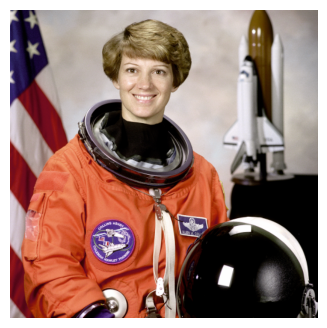

### Zadanie 1. Eksplorator histogramów

Kontekst:  Wyrównanie  zakresu  jasności  często  zaczyna  się  od  zrozumienia  histogramu. 
Chcemy  porównać  rozkłady  tonalne  w  RGB  i  w  skali  szarości  oraz  zademonstrować 
rozciąganie zakresu na percentylach

1. Wczytaj obraz (RGB lub Gray) z skimage.data i/lub własny. 

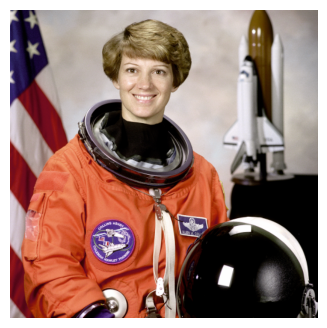

In [8]:
astronaut = data.astronaut()

if astronaut.ndim == 2:
    astronaut = np.stack([astronaut]*3, axis=-1)  # Tworzy RGB z jednego kanału
else:
    astronaut = astronaut[..., :3]

plt.imshow(astronaut)
plt.axis('off')
plt.show()

2. Oblicz i narysuj histogram(y) dla: 
o skali szarości (zbudowanej z RGB jako luminancja lub średnia kanałów), 
o każdego kanału R, G, B (jeśli obraz jest kolorowy). 

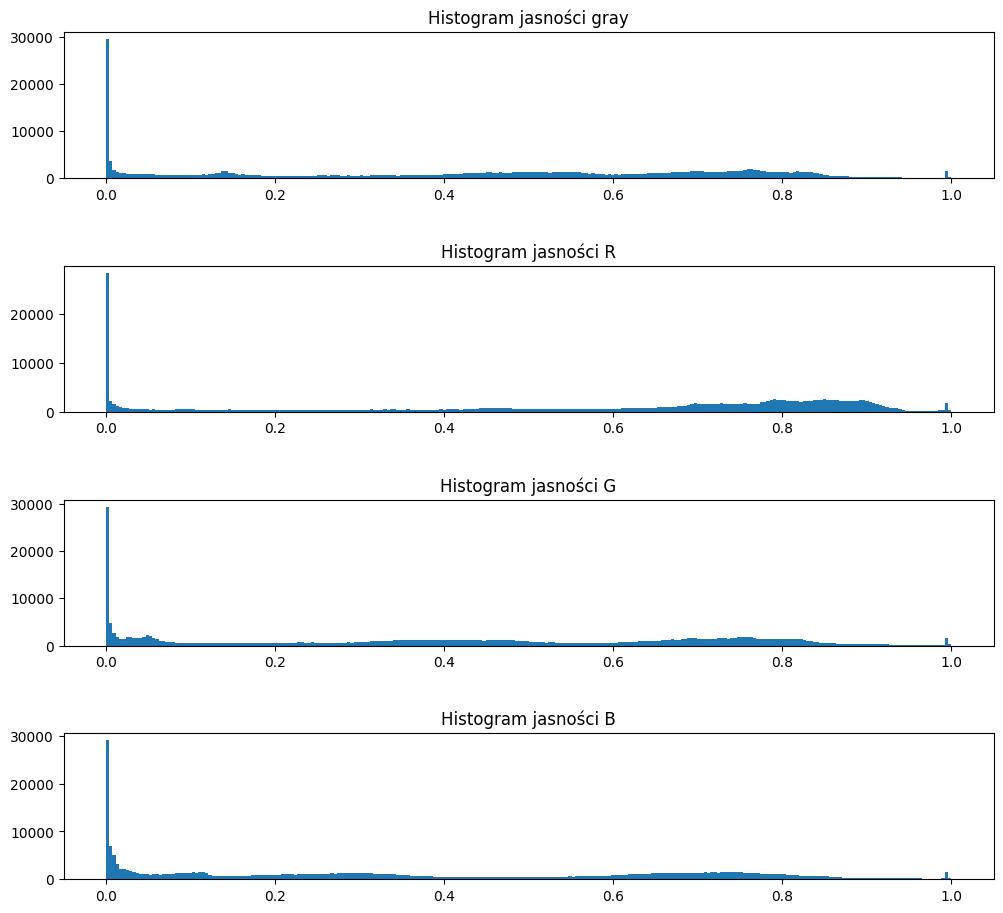

In [37]:
gray = color.rgb2gray(astronaut)
r = astronaut[..., 0]/256
g = astronaut[..., 1]/256
b = astronaut[..., 2]/256

def make_histograms(canals: list, names: list):

    n = len(canals)                          
    fig, axes = plt.subplots(n, 1, figsize=(12, 11))

    for i, ax in enumerate(np.atleast_1d(axes)):
        ax.hist(canals[i].ravel(), bins=256, range=(0,1))
        ax.set_title(f'Histogram jasności {names[i]}')

    plt.subplots_adjust(hspace=0.6)
    plt.show()

make_histograms([gray, r, g, b], ["gray", "R", "G", "B"])


3. Zaimplementuj „stretching” intensywności z odcięciem percentyli p_low i p_high 
(domyślnie 2–98%).

In [38]:
#TODO

 
4. Wyświetl: oryginał, stretched (gray i/lub RGB), odpowiadające histogramy (te same 
ustawienia osi/bins). 
5. Dodaj możliwość zmiany p_low, p_high oraz wyboru sposobu konwersji do Gray 
('lum', 'avg', 'r'/'g'/'b').

Wymagania minimalne. Jedna funkcja, która dla danego obrazu rysuje mozaikę: obraz(y) + 
histogram(y) przed/po; możliwość ustawienia percentyli

Wynik. Krótka notatka (3–5 zdań): co się dzieje z histogramem i kontrastem przy 2–98% vs 
1–99%? 

Wskazówki. skimage.exposure.histogram, exposure.rescale_intensity, matplotlib 
(wspólne osie), normalizacja danych do [0,1]. 

In [ ]:
# Wczytaj obraz (RGB lub Gray) z skimage.data i/lub własny.

gray = color.rgb2gray(astronaut)


if astronaut.ndim == 2:
    img_rgb = np.stack([astronaut]*3, axis=-1)  # Tworzy RGB z jednego kanału
else:
    img_rgb = astronaut[..., :3]  # Usuwa kanał alfa (jeśli istnieje), zachowując R, G, B
    
# ============================================
# a) Podgląd RGB i kanałów R / G / B
# ============================================
# Wyodrębnienie poszczególnych kanałów koloru z obrazu RGB.
r = img_rgb[..., 0]/256  # Kanał czerwony (Red)
g = img_rgb[..., 1]/256  # Kanał zielony (Green)
b = img_rgb[..., 2]/256  # Kanał niebieski (Blue)

# Wyświetlenie oryginalnego obrazu RGB oraz trzech kanałów R, G, B obok siebie.
# Kanały są pokazane w skali szarości, aby uwidocznić ich intensywność.
images = [lena, gray, r, g, b]
show_row(images,
          ['RGB', 'GRAYSCALE', 'R', 'G', 'B'],
          cmap=['gray', 'gray', 'gray', 'gray', 'gray'])

# ============================================
# b) Histogram jasności obrazu
# ============================================
# Konwersja z RGB do skali szarości – wykorzystuje wagowe przeliczenie ludzkiej percepcji jasności:
# Y = 0.2125 * R + 0.7154 * G + 0.0721 * B
# Wynik to obraz typu float z wartościami od 0 (czarny) do 1 (biały).

# Rysowanie histogramu rozkładu jasności pikseli.
# gray.ravel() spłaszcza obraz 2D do jednowymiarowej tablicy wszystkich wartości pikseli.


def histogram_jasnosci(images):
    for i, image in enumerate(images):
        plt.figure()
        if i == 0:
            plt.hist(image.ravel(), bins=256, range=(0, 256))  # 256 przedziałów dla jasności od 0 do 1
        else:
            plt.hist(gray.ravel(), bins=256, range=(0, 1))  # 256 przedziałów dla jasności od 0 do 1
        plt.title('Histogram jasności szarej')  # Tytuł wykresu


histogram_jasnosci(images)
plt.show()  # Wyświetlenie histogramu


images = [lena, gray, ]

NameError: name 'lena' is not defined

In [27]:
for image in images:
    image = exposure.rescale_intensity(image, (min(image), max(image)))



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()